In [1]:
import matplotlib
import pandas as pd
import numpy as np
import scipy.stats as si
import sympy as sy
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy.stats import norm
pd.options.display.max_columns = None
os.chdir('C:/Users/regru/Desktop/Springboard/Springboard_Project2')

In [2]:
#import dataset
df0 = pd.read_csv('telcom_churn.xls')

In [3]:
df0.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Get chi2 and pval for relationship between each categorical variable and churn
categorical_features = df0.columns.drop(['customerID','tenure','MonthlyCharges','TotalCharges','Churn'])
chi2 = np.zeros(len(categorical_features))
p = np.zeros(len(categorical_features))
for i,feature in enumerate(categorical_features):
    chi2[i], p[i],dof, expected = si.chi2_contingency(pd.crosstab(df0[feature],df0.Churn,margins=True).values)

In [5]:
# Create dataframe combining the feature, chi2 and pvalue
# Round chi2 to 2 and pvalue to 4 decimals to fit in table
chi2_a = [round(chi,2) for chi in chi2]
p_a = ['<.0001' if pval<.0001 else round(pval,4) for pval in p]
feature_pval = pd.DataFrame(np.column_stack([categorical_features, chi2_a, p_a]), 
                               columns=['feature', 'chi2', 'pval']).sort_values(by=['chi2'])

Let's look at Chi-square and p-values for each of the categorical variables to see if we have any relationships to churn.

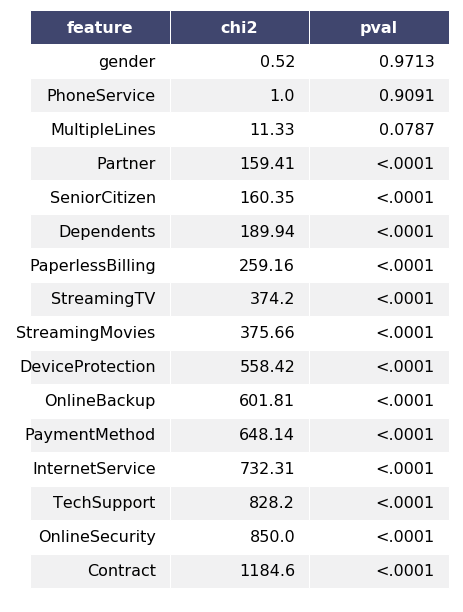

In [6]:
import six
def render_mpl_table(data, col_width=4.0, row_height=0.625, font_size=16,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

render_mpl_table(feature_pval, header_columns=0, col_width=2.5)

Next, I want to look at relationships between variables to see if we kind find any meaningful connections.

In [7]:
df0.Contract.unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

H_o: There is no relationship between partner status and type of contract selected.

H_a: There is a relationship between partner status and type of contract selected.

$\alpha = .05$

In [8]:
partner_obs = pd.crosstab(df0.Partner,df0.Contract,margins=True)
chi2, p, dof, expected = si.chi2_contingency(partner_obs.values)
print (f'Chi-square Statistic : {chi2} ,p-value: {p}')

Chi-square Statistic : 617.2440921596583 ,p-value: 4.4441292473963605e-130


With p < .00001, we reject the null hypothesis in favor of the alternative and conclude that there is a relationship between partner status and the type of contract purchased.

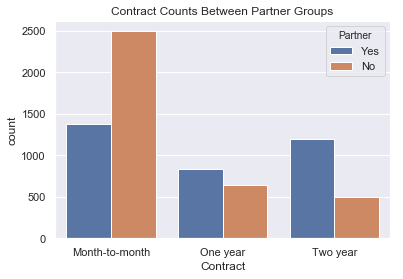

In [9]:
sns.set()
sns.countplot(x='Contract',hue='Partner',data=df0)
plt.title('Contract Counts Between Partner Groups')
plt.show()

Looking at the graph, we can see that single people are more likely to get into a month to month contract than people with a partner. And customers with a partner are more likely to sign one or two year contracts.

H_o: There is no relationship between senior citizen status and type of contract selected.
    
H_a: There is a relationship between senior citizen status and type of contract selected.
    
α=.05

In [10]:
senior_obs = pd.crosstab(df0.SeniorCitizen,df0.Contract,margins=True)
chi2, p, dof, expected = si.chi2_contingency(senior_obs.values)
print (f'Chi-square Statistic : {chi2} ,p-value: {p}')

Chi-square Statistic : 145.77676674829792 ,p-value: 6.041978569381217e-29


With p < .00001, we reject the null hypothesis in favor of the alternative and conclude that there is a relationship between senior citizen status and the type of contract purchased.

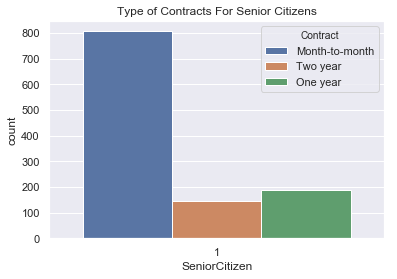

In [11]:
sns.set()
sns.countplot(x='SeniorCitizen',hue='Contract',data=df0[df0.SeniorCitizen == 1])
plt.title('Type of Contracts For Senior Citizens')
plt.show()

The data suggests that Senior Citizen's are more likely to be in month to month contracts.

H_o: There is no relationship between senior citizen status and type of billing selected.
    
H_a: There is a relationship between senior citizen status and type of billing selected.
    
α=.05

In [12]:
senior_bill_obs = pd.crosstab(df0.SeniorCitizen,df0.PaperlessBilling,margins=True)
senior_bill_obs

PaperlessBilling,No,Yes,All
SeniorCitizen,,,
0,2606,3295,5901
1,266,876,1142
All,2872,4171,7043


In [13]:
chi2, p, dof, expected = si.chi2_contingency(senior_bill_obs.values)
print (f'Chi-square Statistic : {chi2} ,p-value: {p}')

Chi-square Statistic : 172.56408519339016 ,p-value: 2.9451669215627265e-36


With p < .00001, we reject the null hypothesis in favor of the alternative and conclude that there is a relationship between senior citizen status and the type of billing selected.

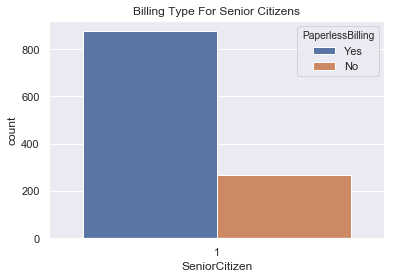

In [14]:
sns.set()
sns.countplot(x='SeniorCitizen',hue='PaperlessBilling',data=df0[df0.SeniorCitizen == 1])
plt.title('Billing Type For Senior Citizens')
plt.show()

Senior citizens are significantly more likely to use paperless billing than paper billing.

H_o: There is no relationship between partner status and online security option.
    
H_a: There is a relationship between partner status and online security option.
    
α=.05

In [15]:
partner_security_obs = pd.crosstab(df0.Partner,df0.OnlineSecurity,margins=True)
partner_security_obs

OnlineSecurity,No,No internet service,Yes,All
Partner,,,,
No,2037,788,816,3641
Yes,1461,738,1203,3402
All,3498,1526,2019,7043


In [16]:
chi2, p, dof, expected = si.chi2_contingency(partner_security_obs.values)
print (f'Chi-square Statistic : {chi2} ,p-value: {p}')

Chi-square Statistic : 162.74248608037738 ,p-value: 1.554187490943653e-32


With p < .00001, we reject the null hypothesis in favor of the alternative and conclude that there is a relationship between partner status and if they purchased online security.

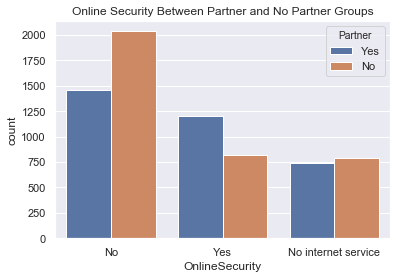

In [17]:
sns.set()
sns.countplot(x='OnlineSecurity',hue='Partner',data=df0)
plt.title('Online Security Between Partner and No Partner Groups')
plt.show()

The graph suggests that of those who chose online security, most had a partner, and of those who selected no online security, most didn't have a partner.

H_o: There is no relationship between partner status and selecting device protection.

H_a: There is a relationship between partner status and selecting device protection.

α=.05

In [18]:
partner_protection_obs = pd.crosstab(df0.Partner,df0.DeviceProtection,margins=True)
partner_protection_obs

DeviceProtection,No,No internet service,Yes,All
Partner,,,,
No,1858,788,995,3641
Yes,1237,738,1427,3402
All,3095,1526,2422,7043


In [19]:
chi2, p, dof, expected = si.chi2_contingency(partner_protection_obs.values)
print (f'Chi-square Statistic : {chi2} ,p-value: {p}')

Chi-square Statistic : 195.40793551503089 ,p-value: 1.800485981859397e-39


With p < .00001, we reject the null hypothesis in favor of the alternative and conclude that there is a relationship between partner status and if they purchased device protection.

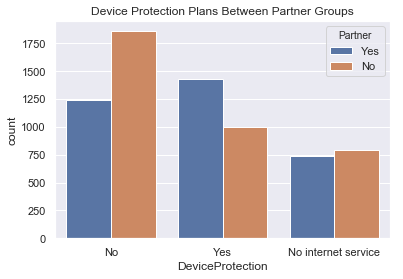

In [20]:
sns.set()
sns.countplot(x='DeviceProtection',hue='Partner',data=df0)
plt.title('Device Protection Plans Between Partner Groups')
plt.show()

The graph suggests that of those who chose a device protection plan, most had a partner and of those who selected no online security, most didn't have a partner.

Is there a correlation between tenure and monthly charges?

C:\Users\regru\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


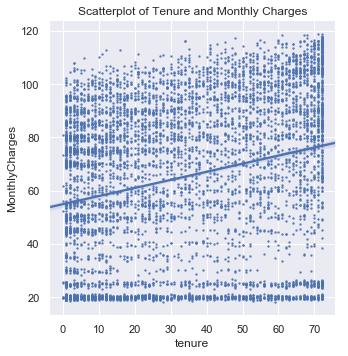

In [21]:
sns.set()
sns.lmplot(x='tenure',y='MonthlyCharges',data=df0,scatter_kws={'s':2})
plt.title('Scatterplot of Tenure and Monthly Charges')
plt.show()

There doesn't appear to be a strong linear relationship between tenure and monthly amount charged.

H_o: There is no relationship between gender and churn.
    
H_a: There is a relationship between gender and churn.
    
α=.05

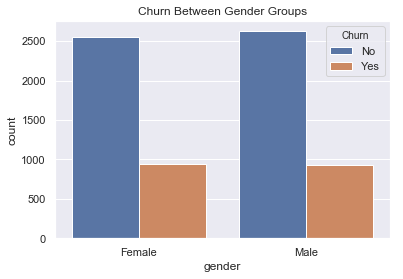

In [22]:
sns.set()
sns.countplot(x='gender',hue='Churn',data=df0)
plt.title('Churn Between Gender Groups')
plt.show()

Looking at the graph we can see no distinguishable difference in churn between genders. 

In [23]:
gender_churn_obs = pd.crosstab(df0.gender,df0.Churn,margins=True)
gender_churn_obs

Churn,No,Yes,All
gender,,,
Female,2549,939,3488
Male,2625,930,3555
All,5174,1869,7043


In [24]:
chi2, p, dof, expected = si.chi2_contingency(gender_churn_obs.values)
print (f'Chi-square Statistic : {chi2} ,p-value: {p}')

Chi-square Statistic : 0.522366503358827 ,p-value: 0.9712873885521255


With p = 0.97, we fail to reject the null hypothesis and conclude that there is no relationship between gender and churn rate.

H_o: There is no relationship between partner status and churn.
    
H_a: There is a relationship between partner status and churn.
    
α=.05

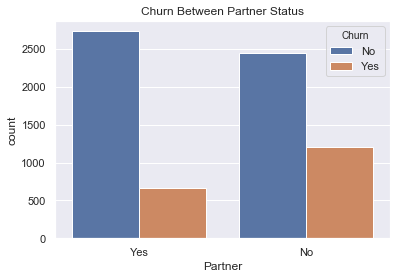

In [25]:
sns.set()
sns.countplot(x='Partner',hue='Churn',data=df0)
plt.title('Churn Between Partner Status')
plt.show()

Looking at the graph there does appear to be a distinguishable difference in churn rate between groups with a partner and without a partner. Let's check if there is a statistical difference.

In [26]:
partner_churn_obs = pd.crosstab(df0.Partner,df0.Churn,margins=True)
partner_churn_obs

Churn,No,Yes,All
Partner,,,
No,2441,1200,3641
Yes,2733,669,3402
All,5174,1869,7043


In [27]:
chi2, p, dof, expected = si.chi2_contingency(partner_churn_obs.values)
print (f'Chi-square Statistic : {chi2} ,p-value: {p}')

Chi-square Statistic : 159.41452843242658 ,p-value: 1.952035040461347e-33


With p < .00001, we reject the null hypothesis in favor of the alternative and conclude that there is a relationship between partner status and churn.

H_o: There is no relationship between senior citizen status and churn.

H_a: There is a relationship between senior citizen status and churn.

α=.05

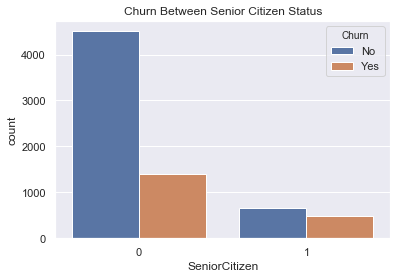

In [28]:
sns.set()
sns.countplot(x='SeniorCitizen',hue='Churn',data=df0)
plt.title('Churn Between Senior Citizen Status')
plt.show()

Looking at the graph there does appear to be a distinguishable difference in churn rate between senior citizen non-senior citizens. Let's check if there is a statistical difference.

In [29]:
senior_churn_obs = pd.crosstab(df0.Partner,df0.Churn,margins=True)
senior_churn_obs

Churn,No,Yes,All
Partner,,,
No,2441,1200,3641
Yes,2733,669,3402
All,5174,1869,7043


In [30]:
chi2, p, dof, expected = si.chi2_contingency(partner_churn_obs.values)
print (f'Chi-square Statistic : {chi2} ,p-value: {p}')

Chi-square Statistic : 159.41452843242658 ,p-value: 1.952035040461347e-33


With p < .00001, we reject the null hypothesis in favor of the alternative and conclude that there is a relationship between senior citizen status and churn.

H_o: There is no relationship between contract type and churn.

H_a: There is a relationship between contract type and churn.

α=.05

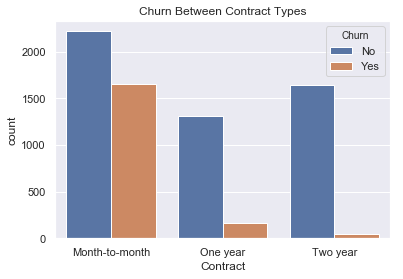

In [31]:
sns.set()
sns.countplot(x='Contract',hue='Churn',data=df0)
plt.title('Churn Between Contract Types')
plt.show()

Churn rate appears to differ drastically between contract types. Let's check for statistical significance.

In [32]:
contract_churn_obs = pd.crosstab(df0.Contract,df0.Churn,margins=True)
contract_churn_obs

Churn,No,Yes,All
Contract,,,
Month-to-month,2220,1655,3875
One year,1307,166,1473
Two year,1647,48,1695
All,5174,1869,7043


In [33]:
chi2, p, dof, expected = si.chi2_contingency(contract_churn_obs.values)
print (f'Chi-square Statistic : {chi2} ,p-value: {p}')

Chi-square Statistic : 1184.5965720837926 ,p-value: 1.0319060455020843e-252


With p < .00001, we reject the null hypothesis in favor of the alternative and conclude that there is a relationship between contract type and churn.